
Housing Price Prediction

In [ ]:
import sys
assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Download data
here i am using kaggle dataset india house prediction
https://www.kaggle.com/datasets/ankushpanday1/india-house-price-prediction/data

In [ ]:
from pathlib import Path
import pandas as pd
import urllib.request

def load_housing_data():
    csv_path = Path("datasets/train.csv")
    if not csv_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/izaanz/ML-Indian-House-Prediction/main/data/india_housing_prices.csv"
        urllib.request.urlretrieve(url, csv_path)
    return pd.read_csv(csv_path)


In [ ]:
housing = load_housing_data()

In [ ]:
housing.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [ ]:
housing["Facing"].value_counts()

,count
Facing,
West,62757
North,62637
South,62337
East,62269


In [ ]:
housing.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [ ]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

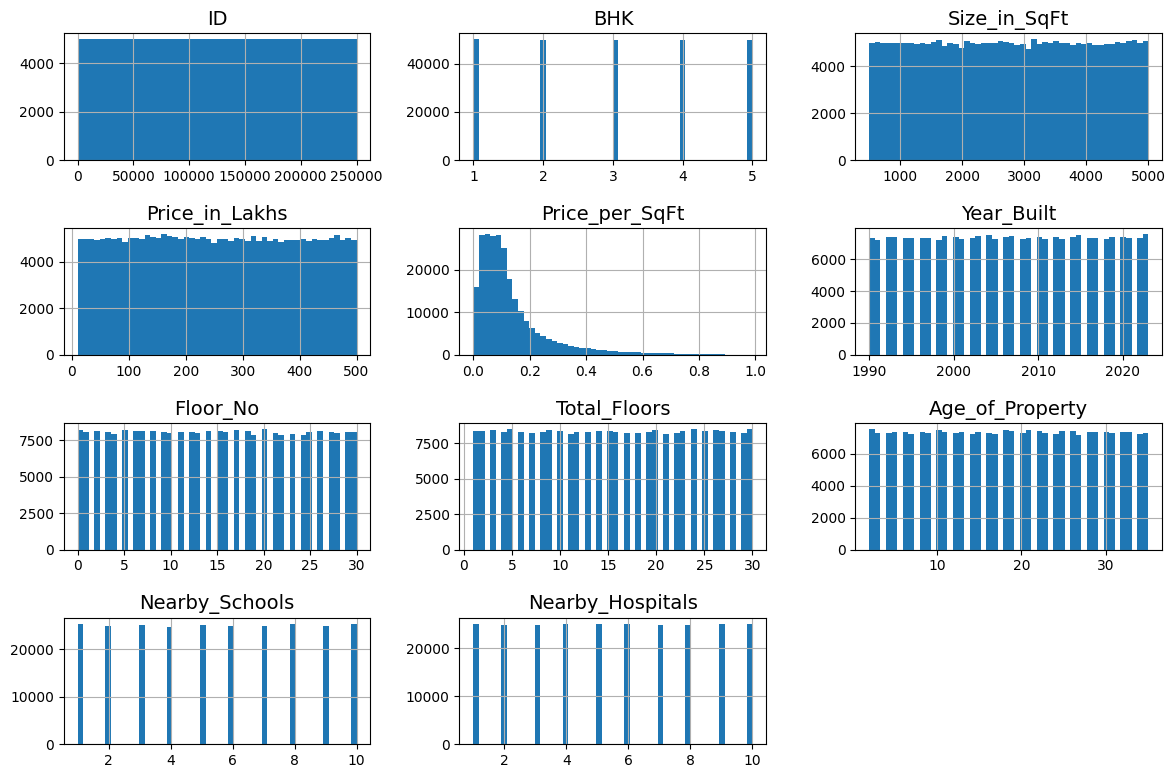

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

create a test set

In [ ]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    # Generate a random permutation of indices from 0 to len(data)-1
    shuffled_indices = np.random.permutation(len(data))

    # Calculate the number of samples in the test set
    test_set_size = int(len(data) * test_ratio)

    # Select first test_set_size indices for test dataset
    test_indices = shuffled_indices[:test_set_size]

    # Remaining indices for training set
    train_indices = shuffled_indices[test_set_size:]

    # Return the corresponding data splits
    return data.iloc[train_indices], data.iloc[test_indices]


In [ ]:
train_set, test_set = shuffle_and_split_data(housing, 0.2) #test ratio can be change , try differ ratio to get differ outcomes
len(train_set)

200000

In [ ]:
len(test_set)

50000

In [ ]:
np.random.seed(42)

In [ ]:
train_set.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
30839,30840,Telangana,Warangal,Locality_376,Villa,4,2406,279.80,0.12,2015,...,10,10,5,Low,No,Yes,"Garden, Playground, Clubhouse",West,Builder,Under_Construction
42472,42473,Uttar Pradesh,Noida,Locality_379,Independent House,2,2220,360.51,0.16,2018,...,7,8,2,Medium,No,Yes,"Pool, Clubhouse",West,Builder,Under_Construction
14857,14858,Uttar Pradesh,Noida,Locality_162,Apartment,5,4244,264.72,0.06,2013,...,12,7,10,Medium,No,No,"Pool, Gym, Playground, Garden",West,Owner,Ready_to_Move
45509,45510,Haryana,Gurgaon,Locality_384,Apartment,3,3095,472.54,0.15,2012,...,13,3,2,Medium,No,No,Garden,North,Owner,Under_Construction
234712,234713,Kerala,Kochi,Locality_397,Villa,1,2668,284.40,0.11,2010,...,15,1,10,Low,No,Yes,Garden,West,Builder,Under_Construction


the CRC32 hash function from Python's zlib library to create a stable, deterministic split of the dataset based on an identifier column. This approach is useful to ensure that the same sample always ends up in the train or test set across multiple runs or dataset updates.

In [ ]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
housing["id"] = (housing["ID"].astype(str) + "_" +
                 housing["State"].astype(str) + "_" +
                 housing["City"].astype(str) + "_" +
                 housing["Locality"].astype(str) + "_" +
                 housing["Property_Type"].astype(str) + "_" +
                 housing["BHK"].astype(str) + "_" +
                 housing["Size_in_SqFt"].astype(str)
                ).apply(hash)


In [ ]:
train_set, test_set = split_data_with_id_hash(housing, 0.2, "id")

In [ ]:
from zlib import crc32
import numpy as np
import pandas as pd

# Function to check if id belongs to test set based on hash
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

# Function to split data using id hash
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# Create unique stable ID for each row by combining key columns and hashing
housing["id"] = (housing["ID"].astype(str) + "_" +
                 housing["State"].astype(str) + "_" +
                 housing["City"].astype(str) + "_" +
                 housing["Locality"].astype(str) + "_" +
                 housing["Property_Type"].astype(str) + "_" +
                 housing["BHK"].astype(str) + "_" +
                 housing["Size_in_SqFt"].astype(str)).apply(hash)

# Split dataset into train and test with 20% test size based on id hashes
train_set, test_set = split_data_with_id_hash(housing, 0.2, "id")

# Check split sizes
print(f"Train set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")


Train set size: 199988
Test set size: 50012


In [ ]:
numeric_cols = train_set.select_dtypes(include=["number"]).columns
corr_matrix = train_set[numeric_cols].corr()



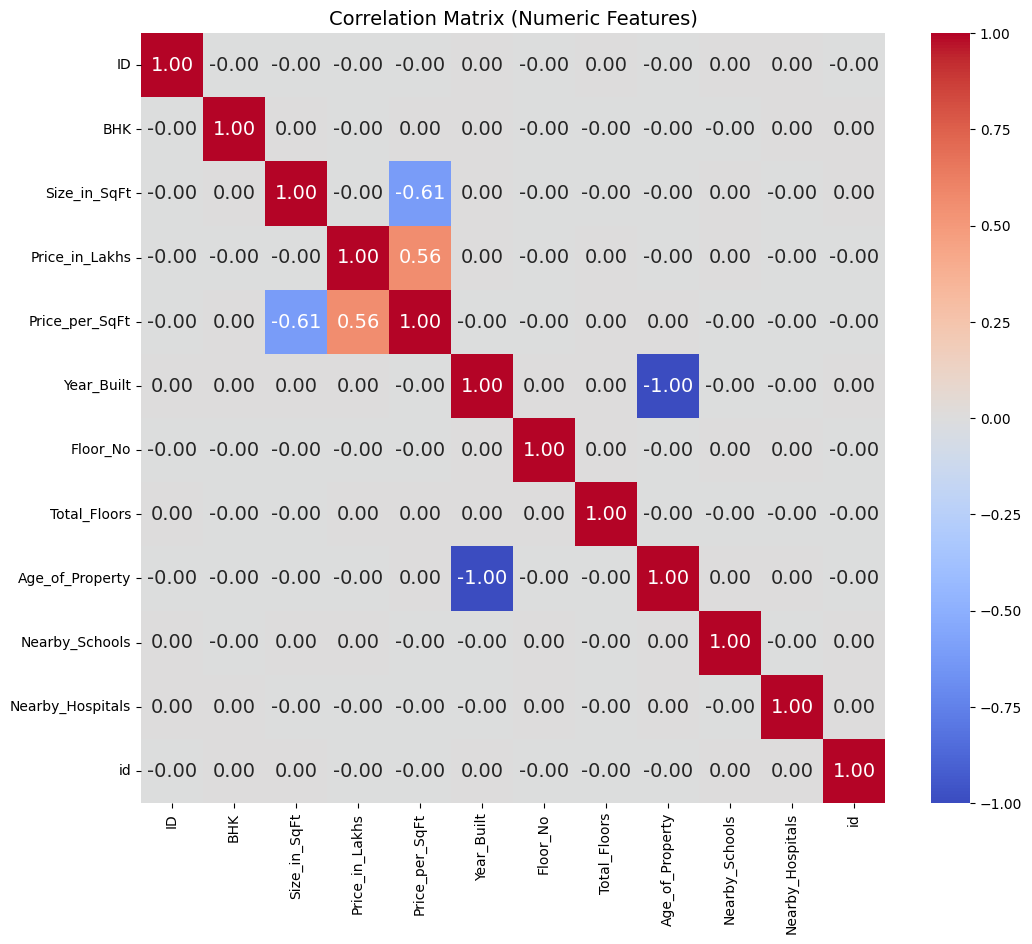

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


In [ ]:
print(corr_matrix["Price_in_Lakhs"].sort_values(ascending=False))


Price_in_Lakhs      1.000000
Price_per_SqFt      0.555517
Year_Built          0.001967
Nearby_Schools      0.001481
Total_Floors        0.000729
BHK                -0.000601
id                 -0.001475
ID                 -0.001721
Age_of_Property    -0.001967
Size_in_SqFt       -0.002579
Nearby_Hospitals   -0.002801
Floor_No           -0.003133
Name: Price_in_Lakhs, dtype: float64


In [ ]:
from sklearn.impute import SimpleImputer

num_cols = housing.select_dtypes(include=["number"]).columns
cat_cols = housing.select_dtypes(include=["object"]).columns

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

housing[num_cols] = num_imputer.fit_transform(housing[num_cols])
housing[cat_cols] = cat_imputer.fit_transform(housing[cat_cols])


In [ ]:
housing_encoded = pd.get_dummies(housing, columns=cat_cols)


In [ ]:
X = housing_encoded.drop(columns=["Price_in_Lakhs", "id"])
y = housing_encoded["Price_in_Lakhs"]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split dataset into features and target using the subset
X_subset = housing_subset.drop(columns=["Price_in_Lakhs", "id"])
y_subset = housing_subset["Price_in_Lakhs"]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Select numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Numeric pipeline: median imputer
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])

# Categorical pipeline: most frequent imputer + one-hot encoder
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [ ]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_features = X_train.select_dtypes(include=["number"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features),
])


In [ ]:
housing_subset = housing.sample(frac=0.1, random_state=42)
display(housing_subset.head())
print(f"Original dataset size: {len(housing)}")
print(f"Subset dataset size: {len(housing_subset)}")

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,id
38683,38684.0,Haryana,Gurgaon,Locality_123,Independent House,4.0,692.0,256.62,0.37,2022.0,...,6.0,6.0,Medium,Yes,No,"Playground, Pool",South,Builder,Ready_to_Move,4.968908e+18
64939,64940.0,Andhra Pradesh,Vishakhapatnam,Locality_74,Apartment,2.0,3094.0,86.04,0.03,2015.0,...,3.0,8.0,Medium,No,No,"Gym, Clubhouse, Pool, Garden",South,Builder,Under_Construction,-6.001502e+18
3954,3955.0,Madhya Pradesh,Bhopal,Locality_486,Apartment,3.0,4993.0,237.86,0.05,1995.0,...,10.0,1.0,High,No,No,"Gym, Pool, Playground, Clubhouse, Garden",West,Owner,Ready_to_Move,-6.215530e+18
120374,120375.0,Punjab,Ludhiana,Locality_13,Villa,1.0,2461.0,339.41,0.14,2018.0,...,10.0,5.0,Low,Yes,No,"Pool, Gym",South,Owner,Under_Construction,-8.197981e+18
172861,172862.0,Haryana,Faridabad,Locality_22,Independent House,2.0,4535.0,124.99,0.03,1991.0,...,5.0,9.0,Medium,No,Yes,Pool,South,Builder,Under_Construction,-7.720404e+18


Original dataset size: 250000
Subset dataset size: 25000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=50, max_depth=10)),
])

model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['ID', 'BHK', 'Size_in_SqFt',
                                                   'Price_per_SqFt',
                                                   'Year_Built', 'Floor_No',
                                                   'Total_Floors',
                                                   'Age_of_Property',
                                                   'Nearby_Schools',
                                                   'Nearby_Hospitals']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['State', 'City', 'Locality',
                                                   'Property_Type',
                                                   'Furnished_Status',
                                                   'Public_Transport_Accessibility',
                                                   'Parking_Space', 'Security',
                                                   'Amenities', 'Facing',
                                                   'Owner_Type',
                                                   'Availability_Status'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1,
                                       random_state=42))])

In [ ]:
y_pred = model_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test set RMSE: {rmse:.2f}")


Test set RMSE: 10.41


In [ ]:
print(y_pred[:10])  # shows first 10 predictions


[472.32288381  32.55691751 407.45782274 113.3860271  257.17699964
 390.75109838 131.61537637 304.87653307 327.19837418  33.62789446]


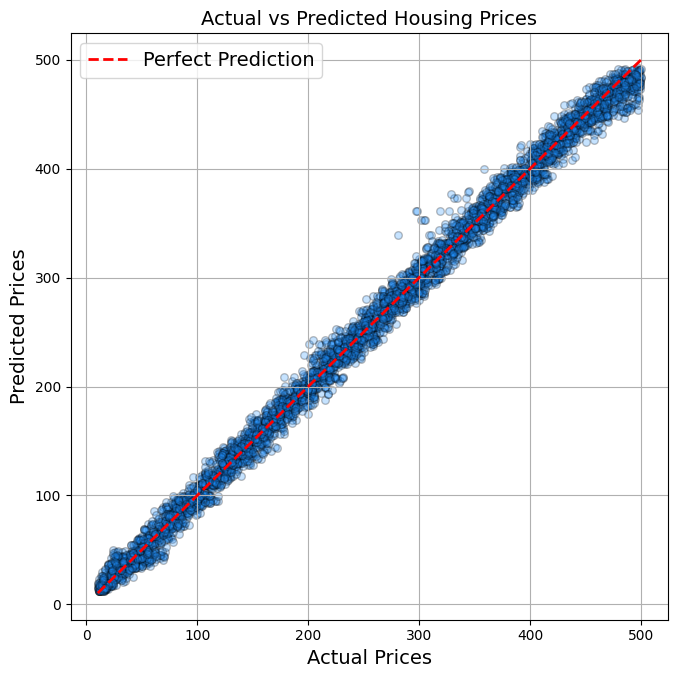

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 7))

plt.scatter(y_test, y_pred, alpha=0.25, color='dodgerblue', edgecolor='k', s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


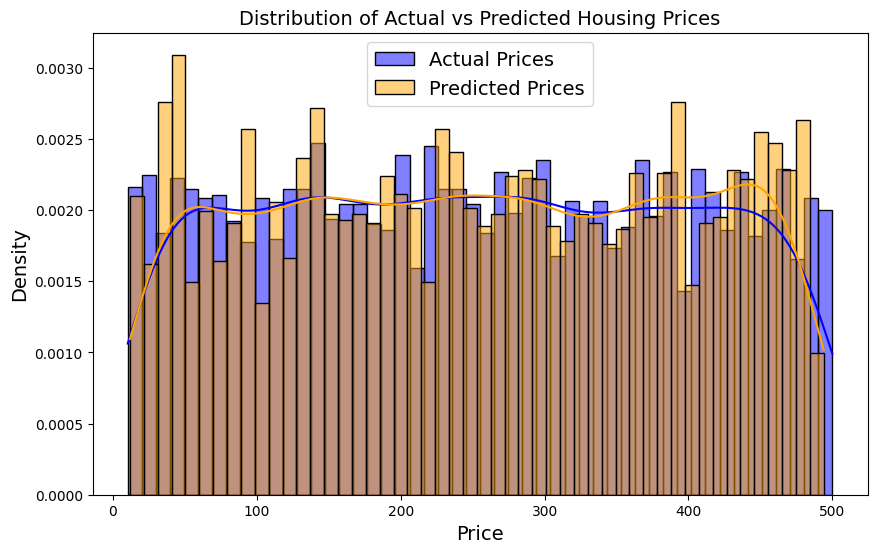

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test, color="blue", label="Actual Prices", kde=True, stat="density", bins=50, alpha=0.5)
sns.histplot(y_pred, color="orange", label="Predicted Prices", kde=True, stat="density", bins=50, alpha=0.5)
plt.legend()
plt.title("Distribution of Actual vs Predicted Housing Prices")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()


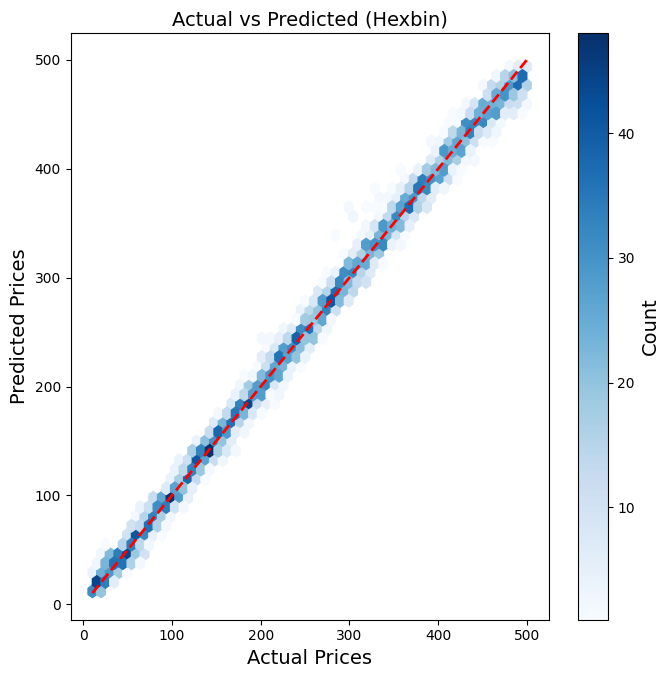

In [ ]:
plt.figure(figsize=(7, 7))
plt.hexbin(y_test, y_pred, gridsize=50, cmap='Blues', mincnt=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Hexbin)")
plt.colorbar(label='Count')
plt.tight_layout()
plt.show()
